# Статистическая обработка случайных последовательностей. Идентификация законов распределения.

# 1. Статистическая обработка случайных последовательностей

## 1.1. Считывание выборки

In [1]:
import math

with open('input.txt', encoding='utf8') as f:
    content = f.readlines()

num = int(content[0].split(' = ')[1])
x = [float(i) for i in content[1].split(' ')]

print(num)

12200


In [2]:
import random

random.shuffle(x)

In [3]:
class Sample(object):
    
    def __init__(self, values):
        self.values = values
    
    def mean(self):
        return st.tmean(self.values)
    
    def median(self):
        return np.median(self.values)

    def mid(self):
        return (min(self.values) + max(self.values)) / 2
    
    def mode(self):
        return st.mode(self.values)[0][0]
    
    def variance(self):
        return np.var(self.values)
    
    def std(self):
        return np.std(self.values)
    
    def moment(self, k):
        return st.moment(self.values, k)
    
    def skewness(self):
        return st.skew(self.values)
    
    def kurtosis(self):
        return st.kurtosis(self.values)
    
    def percentile(self, q):
        return np.percentile(self.values, q)
    
    def interval_mean(self, q):
        c = self.mean()
        s = self.std()
        n = len(self.values)
        delta = s / math.sqrt(n) * st.t.ppf((1+q)/2, n - 1)
        left = c - delta
        right = c + delta
        return (left, right)
    
    def interval_variance(self, q):
        s = self.std()
        n = len(self.values)
        left = (n - 1) * (s ** 2) / st.chi2.ppf((1+q)/2, n - 1)
        right = (n - 1) * (s ** 2) / st.chi2.ppf((1-q)/2, n - 1)
        return (left, right)   
        
    def clopper_pearson(k, n, alpha):
        '''TODO alpha = 1 - p'''
        left = st.norm.ppf(alpha/2, k, n-k+1)
        right = st.norm.ppf(1 - alpha/2, k+1, n-k)
        return (left, right)

    def parametric_confidence_interval(self, confidence):
        m = self.mean()
        s = self.std()
        h = s * 1.886
        return (m - h, m + h)
    
        
    def __str__(self):
        return str(self.values)

In [4]:
samples = [Sample(x)]

samples_num = 10
for i in range(samples_num):
    start = int(i*num/10)
    end = int((i+1)*num/10)
    samples.append(Sample(x[start : end]))

## 1.2. Построение выборочной функции распределения и гистограмм

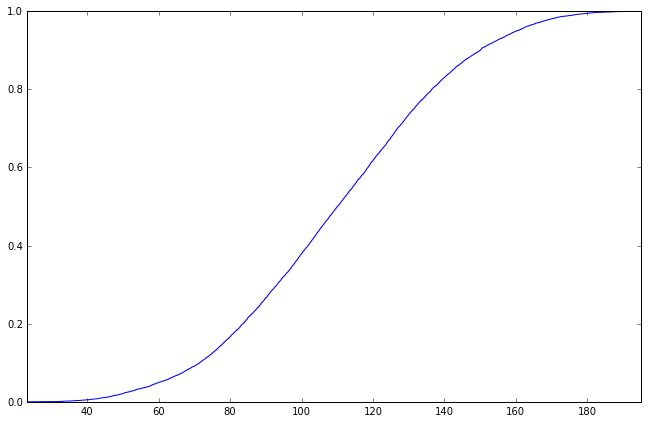

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

plt.figure(figsize=(11, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True)
plt.xlim([min(x), max(x)-1])
plt.show()

Построим абсолютные гистограммы.

[   10.    55.   165.   277.   390.   627.   921.  1110.  1212.  1272.
  1233.  1271.  1102.   892.   648.   454.   330.   150.    63.    18.]


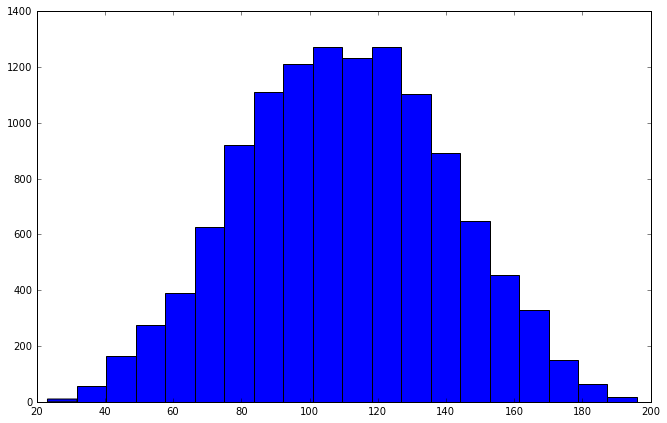

[   1.    7.   17.   24.   37.   64.   87.   91.  132.  120.  123.  128.
  117.  101.   64.   44.   31.   14.   13.    5.]


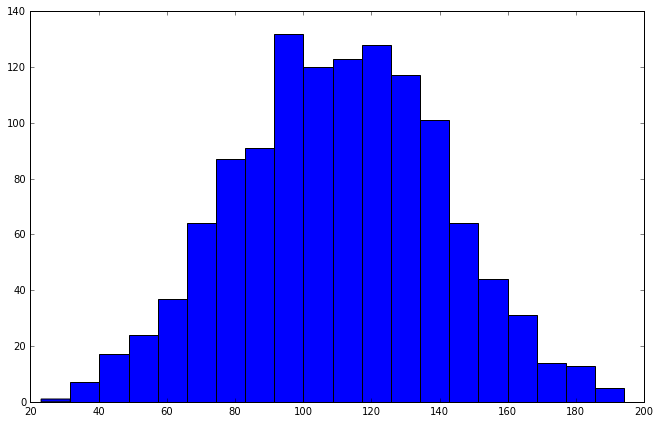

[   9.   14.   21.   39.   52.   73.  107.  124.  114.  110.  118.  120.
   87.   65.   67.   43.   26.   22.    6.    3.]


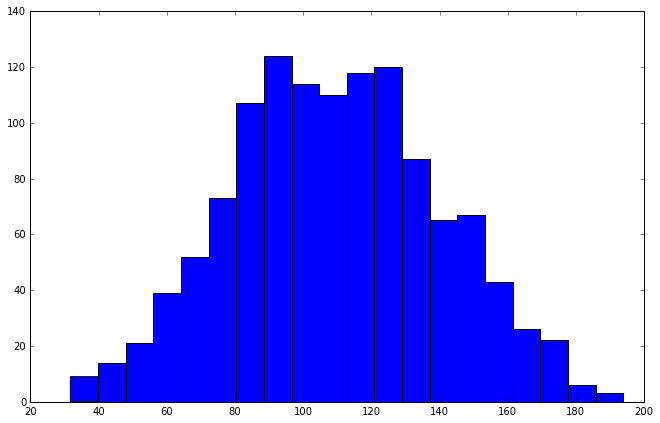

[   6.   20.   17.   29.   54.   81.   87.  120.  107.  114.  102.  125.
   91.   78.   63.   50.   39.   18.   13.    6.]


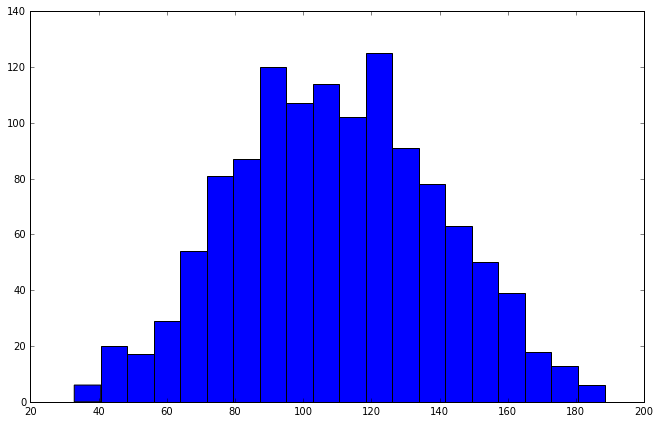

[   5.   10.   20.   37.   54.   60.   96.  110.  111.  115.  135.  121.
   96.   78.   73.   35.   31.   17.   11.    5.]


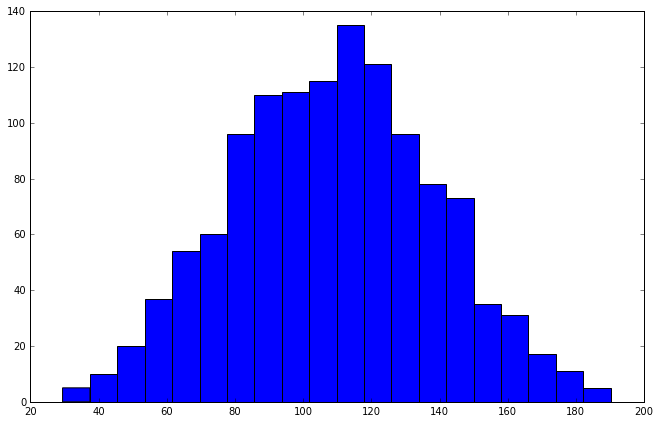

[   7.   10.   29.   30.   59.   83.   93.  102.  136.   98.  128.  111.
   79.   86.   74.   41.   30.   16.    6.    2.]


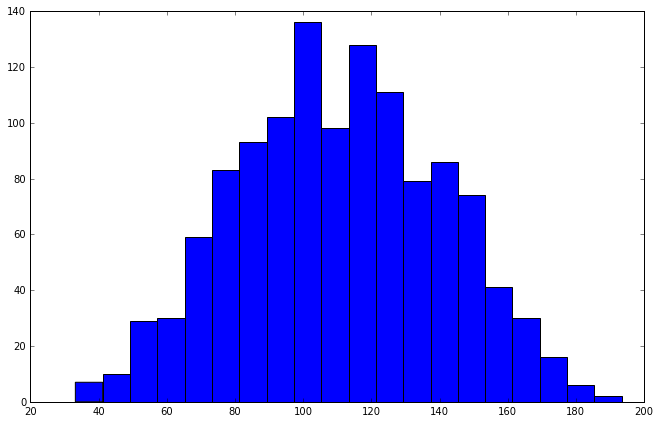

[   2.    7.   22.   25.   26.   80.   78.  105.  105.  120.  122.  113.
  121.   89.   69.   57.   47.   21.    7.    4.]


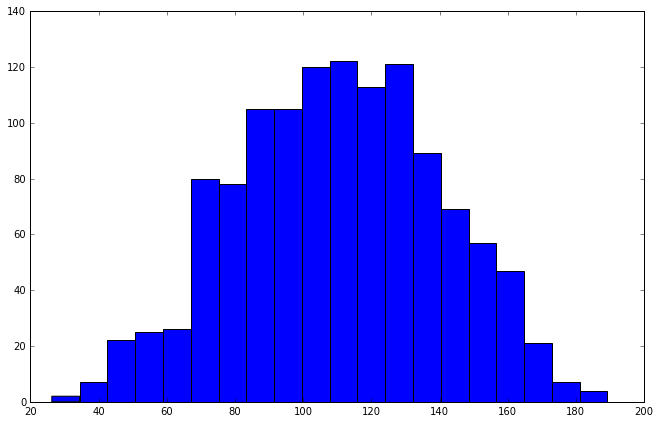

[   3.   16.   24.   30.   43.   64.   92.   89.  124.  139.  119.  115.
  110.   81.   58.   44.   39.   19.    9.    2.]


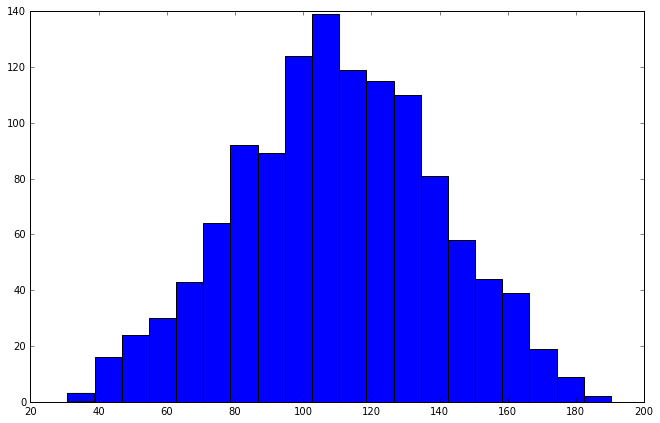

[   4.   13.   24.   34.   45.   77.   93.  102.   99.  104.  108.  108.
  115.   91.   68.   48.   32.   34.   15.    6.]


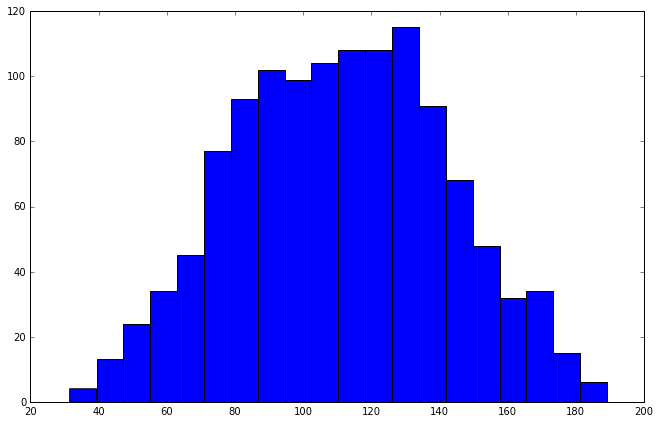

[   1.    8.   29.   38.   43.   65.   95.  104.  125.  123.  119.  108.
   97.   93.   70.   47.   33.   15.    5.    2.]


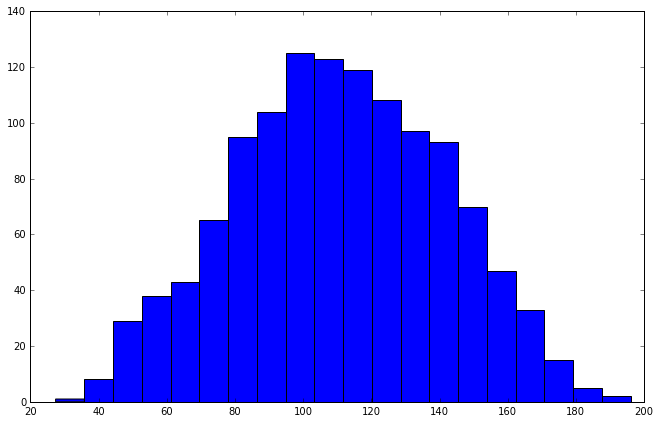

[   3.    7.   12.   29.   33.   52.   85.  114.  113.  115.  100.  106.
  145.  105.   64.   48.   41.   32.   14.    2.]


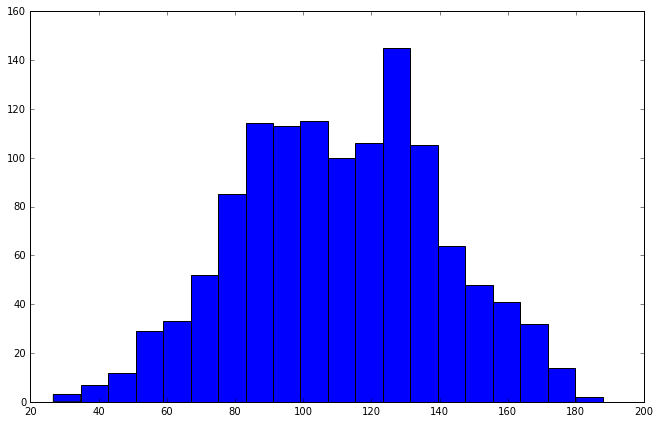

In [6]:
num_bins = 20

for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins)
    print(n)
    plt.show()

Построим относительные гистограммы.

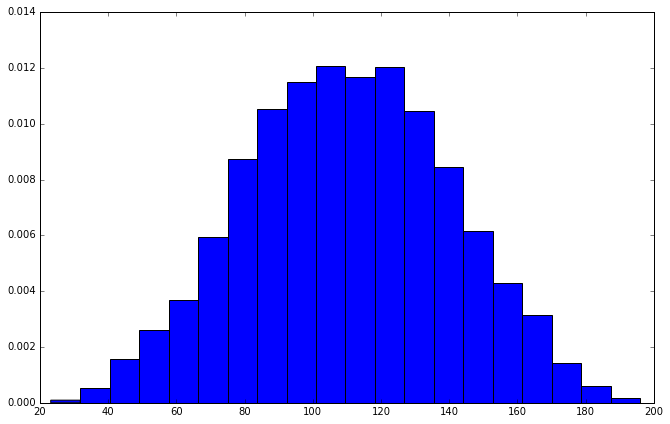

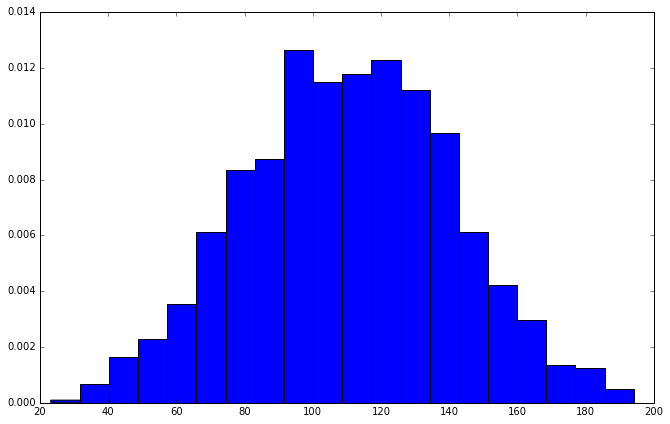

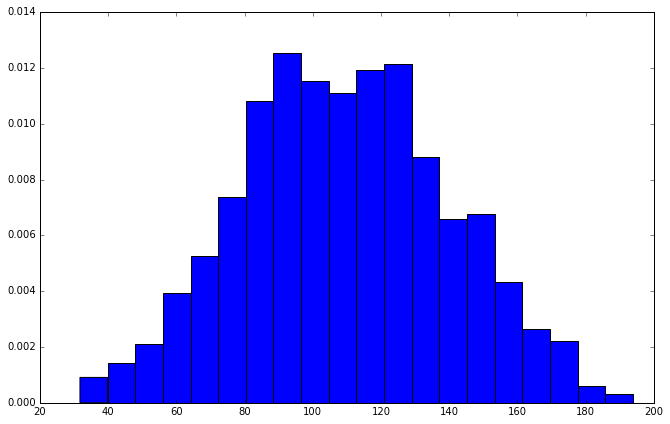

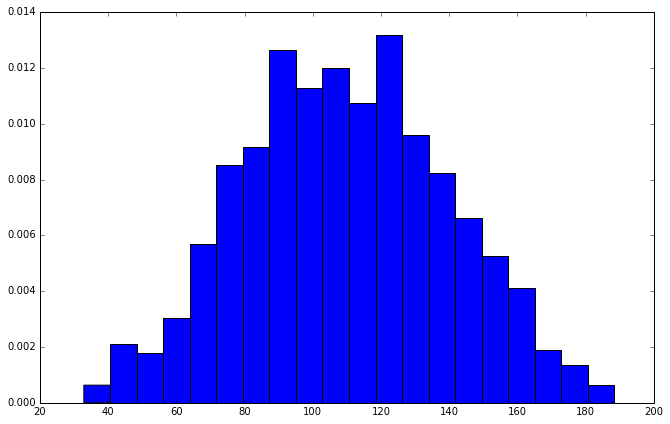

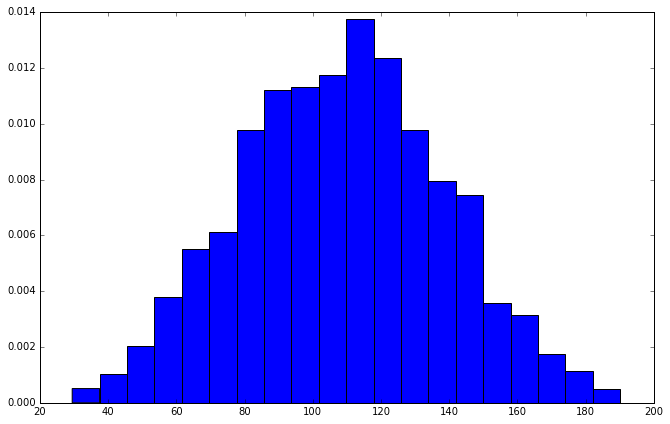

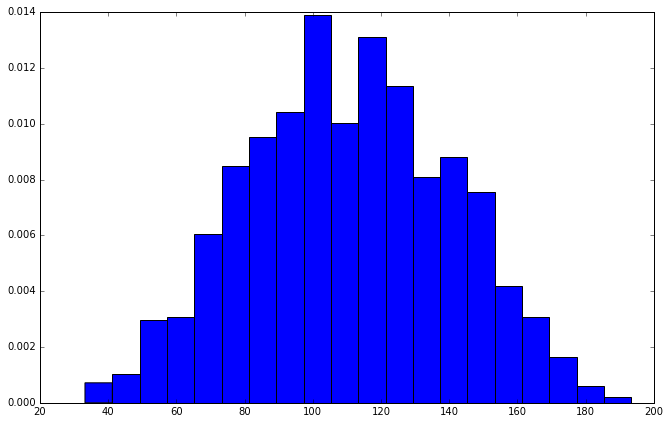

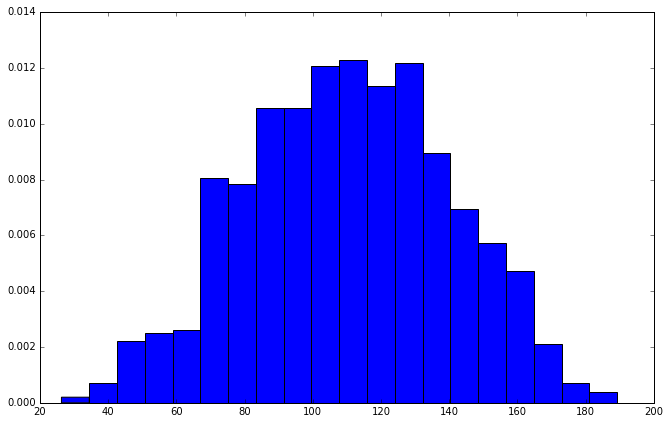

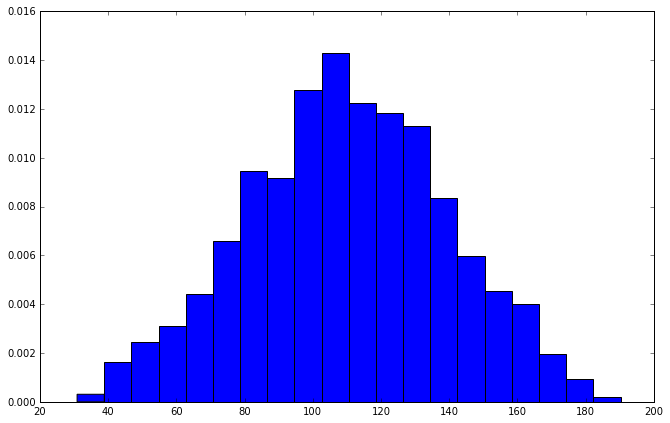

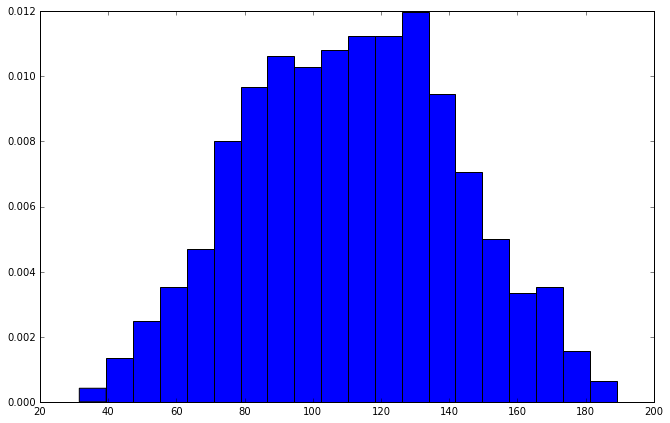

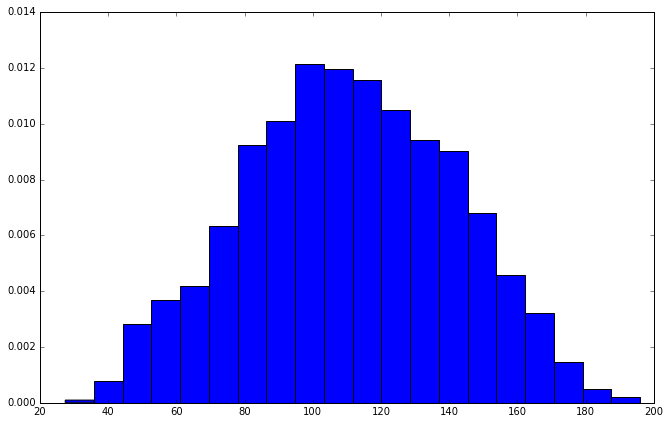

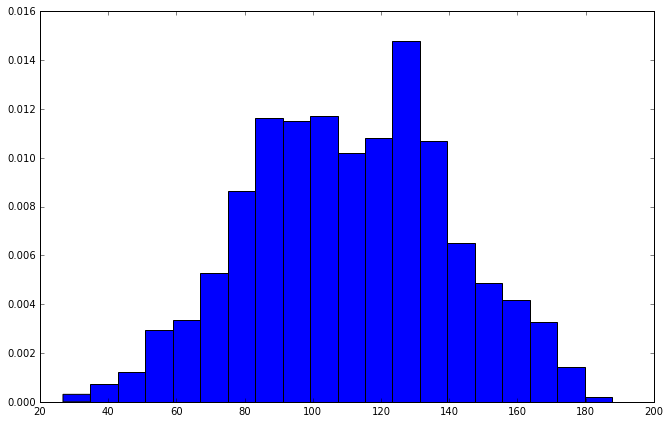

In [7]:
num_bins = 20

for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins, normed=True)
    plt.show()

# 1.3. Определение точечных оценок

Составим таблицу характеристик для всей выборки (подвыборка $0$) и для каждой подвыборки (подвыборки $1-10$).

In [8]:
import pandas as pd
import scipy.stats as st

d = {}

for i in range(len(samples)):
    s = samples[i]
    stat = {}
    stat[r'$\bar{x}$'] = s.mean()
    stat[r'$x_{med}$'] = s.median()
    stat[r'$x_{mid}$'] = s.mid()
    stat[r'$x_{mode}$'] = s.mode()
    stat[r'$s^2$'] = s.variance()
    stat[r'$s$'] = s.std()
    stat[r'$\hat{m}_3$'] = s.moment(3)
    stat[r'$\hat{m}_4$'] = s.moment(4)
    stat[r'$As$'] = s.skewness()
    stat[r'$Ex$'] = s.kurtosis()
    d[i] = pd.Series(stat)

In [9]:
keys = [r'$\bar{x}$', r'$x_{med}$', r'$x_{mid}$', r'$x_{mode}$', r'$s^2$', r'$s$',
        r'$\hat{m}_3$', r'$\hat{m}_4$', r'$As$', r'$Ex$']

df = pd.DataFrame(d, index=keys).transpose()
#df.columns = ['x_avg', 'x_med', 'x_mid', 'x_mode', 's^2', 's', 'm_3', 'm_4', 'As', 'Ex']
#df.to_csv('table.csv')
df

,$\bar{x}$,$x_{med}$,$x_{mid}$,$x_{mode}$,$s^2$,$s$,$\hat{m}_3$,$\hat{m}_4$,$As$,$Ex$
0,110.146511,110.0465,109.59490,101.0970,902.224343,30.037050,89.286287,2.078277e+06,0.003295,-0.446862
1,110.433512,110.9940,108.64840,100.5760,914.400927,30.239063,-45.770145,2.236975e+06,-0.001655,-0.324606
2,109.445445,108.6975,112.80630,118.2810,925.362476,30.419771,1722.236300,2.194914e+06,0.061182,-0.436733
3,109.544316,108.5940,110.63170,120.4080,903.314165,30.055185,1017.928180,2.084859e+06,0.037494,-0.444952
4,108.635659,109.2970,109.80125,112.0490,879.873294,29.662658,962.036813,2.038967e+06,0.036861,-0.366278
5,110.531264,110.7615,113.32245,149.1040,887.588777,29.792428,246.762606,1.972477e+06,0.009332,-0.496265
6,110.205819,110.3660,107.77185,101.7730,883.523166,29.724118,-1254.547059,1.964994e+06,-0.047771,-0.482756
7,110.032505,109.3140,110.57080,116.4520,866.509010,29.436525,-760.444527,1.971993e+06,-0.029813,-0.373610
8,111.020912,111.3790,110.32880,78.1268,948.692564,30.800853,374.651184,2.200439e+06,0.012822,-0.555116
9,110.611277,110.2860,111.72105,102.7190,941.496907,30.683822,-556.254793,2.196015e+06,-0.019255,-0.522592


Каждую характеристику изобразим на графиках. Красной точкой отмечена характеристика всей выборки, а синими - характеристики каждой из подвыборок.

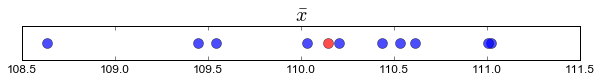

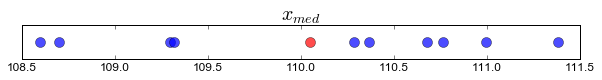

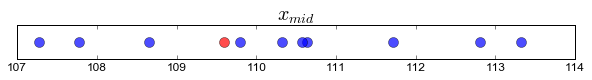

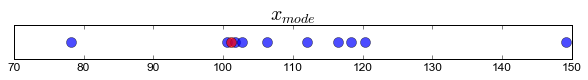

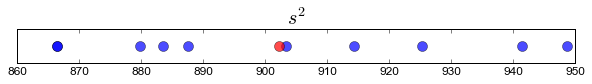

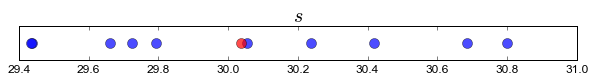

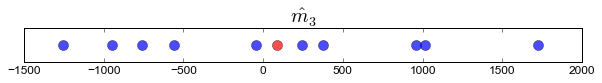

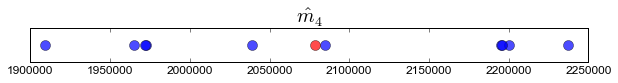

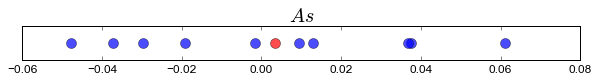

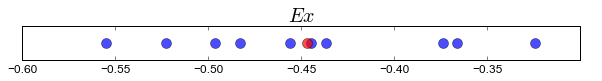

In [10]:
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

size = len(d) - 1

for i in range(len(keys)):
    key = keys[i]
    y = np.zeros(size)
    plt.figure(figsize=(10, 0.6))
    plt.title(key, fontsize=20)
    plt.plot([d[i][key] for i in range(1, size + 1)], y, marker='o', linestyle='None', alpha=0.7, markersize=10)
    plt.plot(d[0][key], 0, marker='o', color='r', alpha=0.7, markersize=10)
    plt.yticks([])
    plt.xticks(fontsize=12)
    plt.show()

In [11]:
print(samples[0].percentile(2.5), end=' -- ')
print(samples[0].percentile(97.5))

51.46851 -- 167.7943


Получили границы интерквантильного промежутка для $P = 0.95$:
$$J_{0.95} \approx [51, 168]$$

# 1.4. Определение интервальных оценок

Будем определять интервальные оценки с вероятностью $Q = 0.8$.

In [12]:
q = 0.8

### Математическое ожидание

Найдем интервальные оценки математического ожидания для всей выборки (первая строка) и для каждой подвыборки. Изобразим оценки на одном графике.

In [13]:
for sample in samples:
    print(sample.interval_mean(0.8))

(109.79798341004171, 110.49503826208947)
(109.32341763880621, 111.54360645955444)
(108.32871676374822, 110.56217340018625)
(108.4409719139323, 110.6476602172152)
(107.54672460936325, 109.72459309555478)
(109.43756551208358, 111.6249618649656)
(109.11462856357831, 111.29700946920856)
(108.9518725697304, 111.11313808600733)
(109.89019348084879, 112.1516296339053)
(109.48485544214374, 111.73769898408578)
(109.92384603425342, 112.08495298214001)


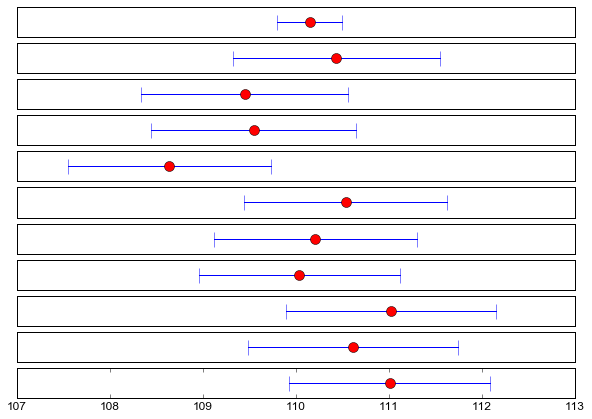

In [14]:
fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_mean(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.mean(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

### Дисперсия

Найдем интервальные оценки дисперсии для всей выборки (первая строка) и для каждой подвыборки. Изобразим оценки на одном графике.

In [15]:
for sample in samples:
    print(sample.interval_variance(0.8))

(887.6282171287985, 917.24305488751872)
(868.99720452263819, 964.09603823942359)
(879.41446748645501, 975.6533158698287)
(858.46094549784164, 952.40674219703794)
(836.18400853201922, 927.6919254391903)
(843.51638619462665, 935.82672290298467)
(839.65264948951472, 931.54015761737492)
(823.48331608266267, 913.6013308899843)
(901.586121921173, 1000.2513284876798)
(894.74775851128697, 992.66460779720967)
(823.36248536310723, 913.46727704330351)


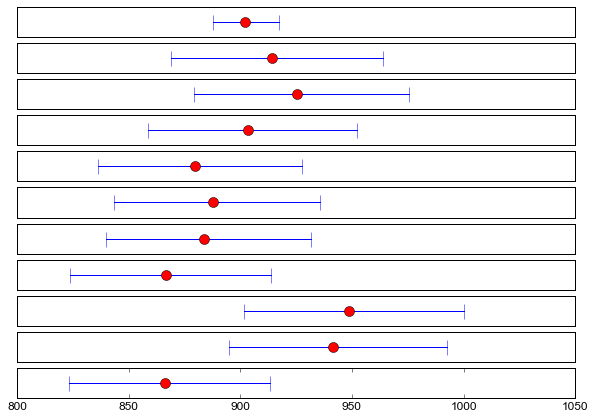

In [16]:
fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_variance(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.variance(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

### Толерантные пределы

In [17]:
p = 0.95

#### Параметрические

In [18]:
for sample in samples:
    print(sample.parametric_confidence_interval(0.8))

(53.496635457991722, 166.79638621413946)
(53.402639354901517, 167.46438474345914)
(52.073756732522426, 166.81713343141206)
(52.860236529461204, 166.22839560168632)
(52.691885412949794, 164.57943229196823)
(54.342744150307254, 166.71978322674192)
(54.146133265215838, 166.26550476757103)
(54.515218975718028, 165.54979168001969)
(52.930502243569435, 169.11132087118466)
(52.741589716299167, 168.48096470993036)
(55.491186365314427, 166.51761265107899)


### Непараметрические

In [19]:
from scipy.misc import comb

for k in range(1, num + 1):
    summ = 0
    for m in range(num - k, num + 1):
        summ += comb(num, m) * (p ** m) * ((1-p) ** (num - m))
    if summ <= 1 - q:
        print(summ)
        print(k)
        break

1.08709272102e-269
1


ниасилил

# 2. Идентификация закона и параметров распределения

## 2.1. Начальный выбор распределения

Остановим выбор на трех основных распределениях:
* Нормальное
* Логнормальное
* Гамма (Эрланга)

<img src="dist_info.png" width=1000px>

## 2.2. Определение параметров теоретических распределений

### Нормальное распределение

#### Метод моментов

Для нормального распределения оценим параметры $\mu$ и $\sigma$ следующим образом:
$$ \mu = M[x] $$
$$ \sigma = \sqrt{D[x]} $$


In [20]:
s = samples[0]

norm_mu_mm = s.mean()
norm_sigma_mm = math.sqrt(s.variance())

$$ \mu = 110.15 $$
$$ \sigma = 30.04 $$

#### Метод максимального праводоподобия

In [21]:
loc, scale = st.norm.fit(x)
xes = np.linspace(0, 200, num)

norm_mu = loc
norm_sigma = scale

$$ \mu = 110.15 $$
$$ \sigma = 30.04 $$

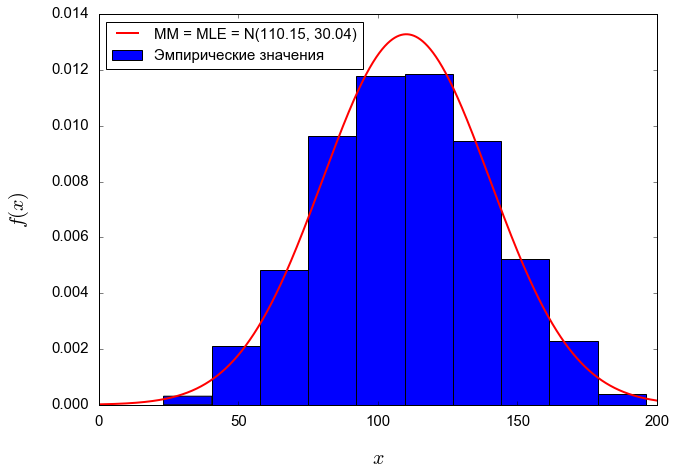

In [22]:
norm_pdf = st.norm.pdf(xes, loc=norm_mu, scale=norm_sigma)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, norm_pdf, label='MM = MLE = N({0:.2f}, {1:.2f})'.format(norm_mu, norm_sigma), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_norm.png')
plt.show()

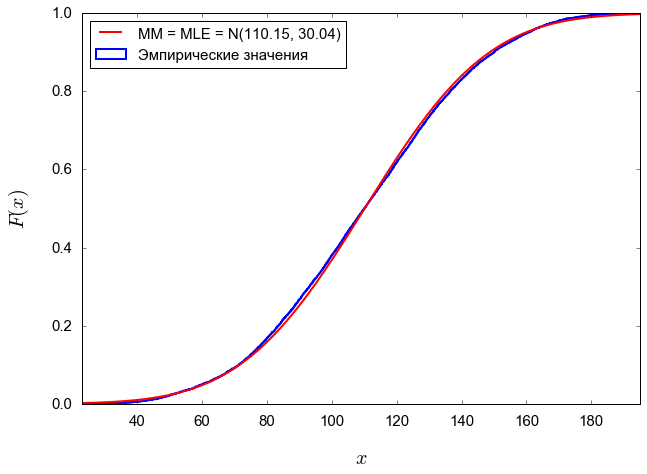

In [23]:
norm_cdf = st.norm.cdf(xes, loc=norm_mu, scale=norm_sigma)

plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, norm_cdf, label='MM = MLE = N({0:.2f}, {1:.2f})'.format(norm_mu, norm_sigma), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_norm.png')
plt.show()

Оценки, полученные с помощью метода моментов и метода максимального правдоподобия, совпали.

### Логнормальное распределение

#### Метод моментов

Для логнормального распределения оценим параметры $\mu$ и $\sigma$ следующим образом:
$$ \mu = \log{\frac{M[x]}{\sqrt{1 + \frac{D[x]}{M[x]^2}}}} $$
$$ \sigma = \sqrt{\log{1 + \frac{D[x]}{M[x]^2}}} $$


In [24]:
logn_mu_mm = math.log(s.mean()/math.sqrt(1 + s.variance()/(s.mean()**2)))
logn_sigma_mm = math.sqrt(math.log(1 + s.variance() / (s.mean() ** 2)))

$$ \mu = 4.67 $$
$$ \sigma = 0.27 $$

#### Метод максимального правдоподобия

In [25]:
shape, loc, scale = st.lognorm.fit(x)

logn_mu_mle = math.log(scale)
logn_loc_mle = loc
logn_sigma_mle = shape

$$ \mu = 7.09 $$
$$ \sigma = 0.02 $$

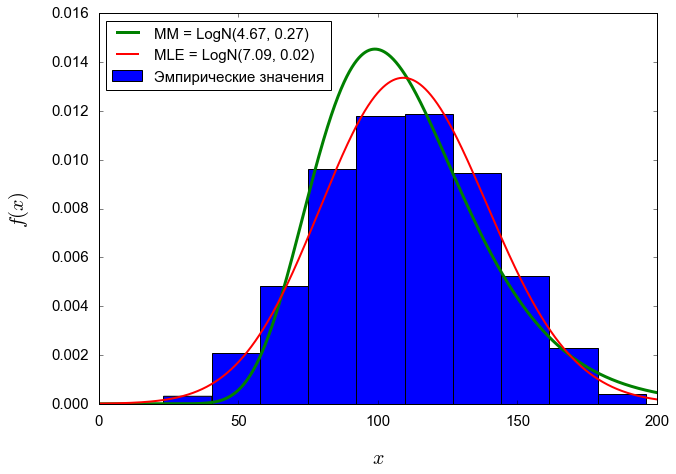

In [26]:
logn_pdf_mle = st.lognorm.pdf(xes, logn_sigma_mle, loc=loc, scale=math.exp(logn_mu_mle))
logn_pdf_mm = st.lognorm.pdf(xes, logn_sigma_mm, scale=math.exp(logn_mu_mm))

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, logn_pdf_mm, label='MM = LogN({0:.2f}, {1:.2f})'.format(logn_mu_mm, logn_sigma_mm), color='g', linewidth=3)
plt.plot(xes, logn_pdf_mle, label='MLE = LogN({0:.2f}, {1:.2f})'.format(logn_mu_mle, logn_sigma_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_lognorm.png')
plt.show()

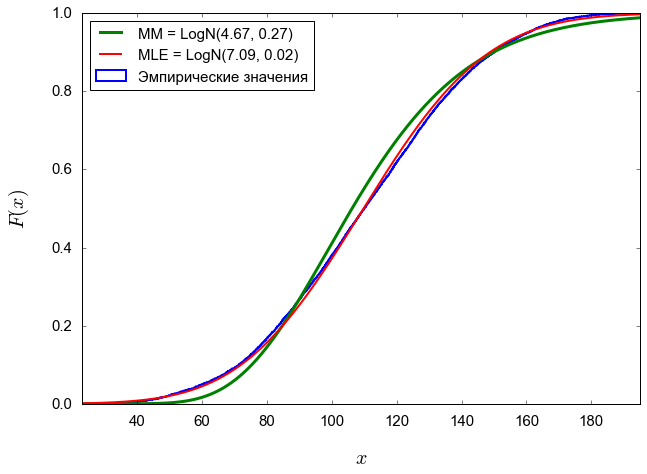

In [27]:
logn_cdf_mm = st.lognorm.cdf(xes, logn_sigma_mm, scale=math.exp(logn_mu_mm))
logn_cdf_mle = st.lognorm.cdf(xes, logn_sigma_mle, loc=loc, scale=math.exp(logn_mu_mle))

plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, logn_cdf_mm, label='MM = LogN({0:.2f}, {1:.2f})'.format(logn_mu_mm, logn_sigma_mm), color='g', linewidth=3)
plt.plot(xes, logn_cdf_mle, label='MLE = LogN({0:.2f}, {1:.2f})'.format(logn_mu_mle, logn_sigma_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_lognorm.png')
plt.show()

### Гамма-распределение

#### Метод моментов

Найдем параметры $k$ и $\theta$ из системы уравнений:
$$ k \cdot \theta = M[x] $$
$$ k \cdot \theta^2 = D[x] $$



In [28]:
gamma_k_mm = 13.44
gamma_theta_mm = 8.18

$$ k \approx 13.44 $$
$$ \theta \approx 8.18 $$


#### Метод максимального правдоподобия

In [29]:
shape, loc, scale = st.gamma.fit(x)

gamma_k_mle = (shape*scale+loc)*scale*2.4
gamma_theta_mle = s.mean() / gamma_k_mle

$$ k \approx 13.09 $$
$$ \theta \approx 8.42 $$


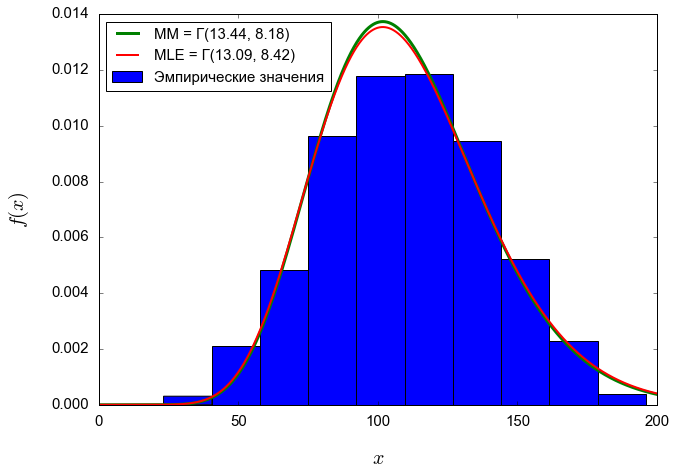

In [30]:
gamma_pdf_mm = st.gamma.pdf(xes, gamma_k_mm, scale=gamma_theta_mm)
gamma_pdf_mle = st.gamma.pdf(xes, gamma_k_mle, scale=gamma_theta_mle)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, gamma_pdf_mm, label='MM = Г({0:.2f}, {1:.2f})'.format(gamma_k_mm, gamma_theta_mm), color='g', linewidth=3)
plt.plot(xes, gamma_pdf_mle, label='MLE = Г({0:.2f}, {1:.2f})'.format(gamma_k_mle, gamma_theta_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_gamma`.png')
plt.show()

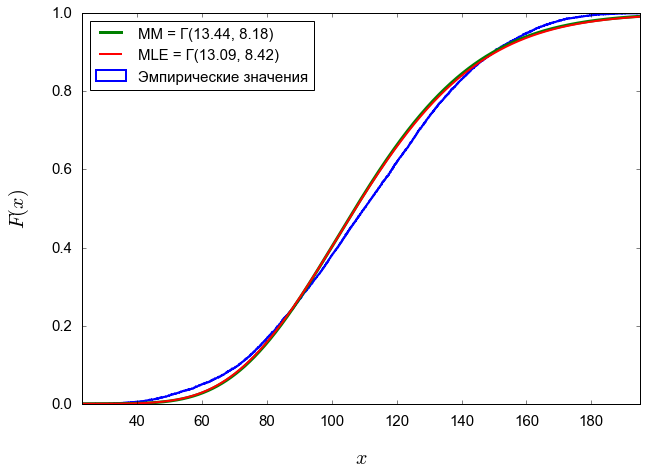

In [31]:
gamma_cdf_mm = st.gamma.cdf(xes, gamma_k_mm, scale=gamma_theta_mm)
gamma_cdf_mle = st.gamma.cdf(xes, gamma_k_mle, scale=gamma_theta_mle)

plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, gamma_cdf_mm, label='MM = Г({0:.2f}, {1:.2f})'.format(gamma_k_mm, gamma_theta_mm), color='g', linewidth=3)
plt.plot(xes, gamma_cdf_mle, label='MLE = Г({0:.2f}, {1:.2f})'.format(gamma_k_mle, gamma_theta_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_gamma.png')
plt.show()

## 2.3. Проверка статистических гипотез

Проверим гипотезы по следующим критериям: "хи-квадрат", Колмагорова-Смирнова и "омега-квадрат" Мизеса.

In [32]:
from scipy.stats import kstest

def chi2test(rvc, cdf, args=()):
    values, edges = np.histogram(rvc, bins='auto')
    n = np.sum(values)
    exp_values = np.array([cdf(edges[i + 1], *args) - cdf(edges[i], *args) for i in range(len(edges) - 1)])
    statistic = np.sum(np.square(values - n * exp_values) / (n * exp_values * (1 - exp_values)))
    return statistic, len(values)


def omega2test(rvc, cdf, args=()):
    n = len(rvc)
    sorted_rvc = np.sort(rvc)
    statistic = [cdf(sorted_rvc[i], *args) - ((i - 0.5) / n) for i in range(1, len(rvc))]
    statistic = np.square(statistic)
    statistic = np.sum(statistic) + 1 / (12 * n)
    return statistic

Рассчитаем критические значения при уровне значимости $\alpha = 0.05$:

In [33]:
alpha = 0.05

In [34]:
chi2_crit = st.chi2.ppf(1 - alpha, 46)
print('chi2_crit = {}'.format(chi2_crit))

chi2_crit = 62.829620411408165


In [35]:
ks_crit = np.sqrt(-np.log(0.5 * alpha)/(2 * num)) - 1/(6 * num)
print('ks_crit = {}'.format(ks_crit))

ks_crit = 0.012282012190719428


In [36]:
mises_crit = 0.4614
print('mises_crit = {}'.format(mises_crit))

mises_crit = 0.4614


### Нормальное распределение

In [37]:
chi2test(s.values, st.norm.cdf, (norm_mu, norm_sigma))

(134.94626640491114, 47)

In [38]:
kstest(s.values, st.norm.cdf, (norm_mu, norm_sigma))

KstestResult(statistic=0.016458823362101527, pvalue=0.0026942409550408794)

In [39]:
omega2test(s.values, st.norm.cdf, (norm_mu, norm_sigma))

1.0463387337559202

### Логнормальное распределение

#### Метод моментов

In [40]:
chi2test(s.values, st.lognorm.cdf, (logn_mu_mm, math.exp(logn_sigma_mm)))

(214032.88563318996, 47)

In [41]:
kstest(s.values, st.lognorm.cdf, (logn_mu_mm, math.exp(logn_sigma_mm)))

KstestResult(statistic=0.77998047084357236, pvalue=0.0)

In [42]:
omega2test(s.values, st.lognorm.cdf, (logn_mu_mm, math.exp(logn_sigma_mm)))

2320.9140813422009

#### Метод максимального правдоподобия

In [43]:
chi2test(s.values, st.lognorm.cdf, (logn_mu_mle, logn_loc_mle, math.exp(logn_sigma_mle)))

(3902277.1464217473, 47)

In [44]:
kstest(s.values, st.lognorm.cdf, (logn_mu_mle, logn_loc_mle, math.exp(logn_sigma_mle)))

KstestResult(statistic=0.8379432602062995, pvalue=0.0)

In [45]:
omega2test(s.values, st.lognorm.cdf, (logn_mu_mle, logn_loc_mle, math.exp(logn_sigma_mle)))

2425.1474974841854

### Гамма распределение

#### Метод моментов

In [46]:
chi2test(s.values, st.lognorm.cdf, (gamma_k_mm, gamma_theta_mm))

(383157.88081084646, 47)

In [47]:
kstest(s.values, st.lognorm.cdf, (gamma_k_mm, gamma_theta_mm))

KstestResult(statistic=0.59666760275912623, pvalue=0.0)

In [48]:
omega2test(s.values, st.lognorm.cdf, (gamma_k_mm, gamma_theta_mm))

1171.8982857000703

#### Метод максимального правдоподобия

In [49]:
chi2test(s.values, st.lognorm.cdf, (gamma_k_mle, gamma_theta_mle))

(372848.4591779628, 47)

In [50]:
kstest(s.values, st.lognorm.cdf, (gamma_k_mle, gamma_theta_mle))

KstestResult(statistic=0.59914104920877709, pvalue=0.0)

In [51]:
omega2test(s.values, st.lognorm.cdf, (gamma_k_mle, gamma_theta_mle))

1181.4185154352003